In [ ]:
import os
import torch

os.environ['HF_ENDPOINT'] = 'https://hf-mirror.com'

if torch.cuda.is_available():
    device = torch.device('cuda')
elif torch.backends.mps.is_available():
    device = torch.device('mps')
else:
    device = torch.device('cpu')

torch.set_default_device(device)
print(f"Using device = {torch.get_default_device()}")

Using device = cuda:0


## 重新分类-OWASP Top 10

In [2]:
from datasets import load_dataset

vul_type = ['A01:2021-Broken Access Control', 'A02:2021-Cryptographic Failures', 'A03:2021-Injection', 'A04:2021-Insecure Design', 'A05:2021-Security Misconfiguration', 'A06:2021-Vulnerable and Outdated Components', 'A07:2021-Identification and Authentication Failures', 'A08:2021-Software and Data Integrity Failures', 'A09:2021-Security Logging and Monitoring Failures', 'A10:2021-Server-Side Request Forgery', 'Other']
cwe_top10_dict = {'Relative Path Traversal': 0, "Path Traversal: '.../...//'": 0, "Improper Link Resolution Before File Access ('Link Following')": 0, 'Exposure of Sensitive Information to an Unauthorized Actor': 0, 'Exposure of Sensitive Information Through Sent Data': 0, 'Storage of File with Sensitive Data Under Web Root': 0, 'Permissions, Privileges, and Access Controls (should no longer be used)': 0, 'Permission Issues': 0, 'Incorrect Default Permissions': 0, 'Improper Access Control': 0, 'Improper Authorization': 0, 'Cross-Site Request Forgery (CSRF)': 0, 'Exposure of Private Personal Information to an Unauthorized Actor': 0, 'Insecure Temporary File': 0, "Transmission of Private Resources into a New Sphere ('Resource Leak')": 0, "Direct Request ('Forced Browsing')": 0, "Unintended Proxy or Intermediary ('Confused Deputy')": 0, 'Exposure of Sensitive System Information to an Unauthorized Control Sphere': 0, 'Insertion of Sensitive Information into Externally-Accessible File or Directory': 0, 'Inclusion of Sensitive Information in Source Code': 0, 'Exposure of Information Through Directory Listing': 0, 'Files or Directories Accessible to External Parties': 0, 'Authorization Bypass Through User-Controlled SQL Primary Key': 0, "URL Redirection to Untrusted Site ('Open Redirect')": 0, 'Authorization Bypass Through User-Controlled Key': 0, 'Exposure of WSDL File Containing Sensitive Information': 0, 'Exposure of Resource to Wrong Sphere': 0, 'Use of Incorrectly-Resolved Name or Reference': 0, 'Missing Authorization': 0, 'Incorrect Authorization': 0, 'Improper Control of Dynamically-Managed Code Resources': 0, 'Insecure Storage of Sensitive Information': 0, 'Sensitive Cookie with Improper SameSite Attribute': 0, 'Weak Encoding for Password': 1, "Improper Following of a Certificate's Chain of Trust": 1, 'Cryptographic Issues': 1, 'Cleartext Transmission of Sensitive Information': 1, 'Use of Hard-coded Cryptographic Key': 1, 'Key Exchange without Entity Authentication': 1, 'Reusing a Nonce, Key Pair in Encryption': 1, 'Use of a Key Past its Expiration Date': 1, 'Missing Required Cryptographic Step': 1, 'Inadequate Encryption Strength': 1, 'Use of a Broken or Risky Cryptographic Algorithm': 1, 'Reversible One-Way Hash': 1, 'Not Using a Random IV with CBC Mode': 1, 'Use of Insufficiently Random Values': 1, 'Insufficient Entropy': 1, 'Incorrect Usage of Seeds in Pseudo-Random Number Generator(PRNG)': 1, 'Same Seed in Pseudo-Random Number Generator (PRNG)': 1, 'Predictable Seed in Pseudo-Random Number Generator (PRNG)': 1, 'Use of Cryptographically Weak Pseudo-Random Number Generator(PRNG)': 1, 'Generation of Predictable Numbers or Identifiers': 1, 'Improper Verification of Cryptographic Signature': 1, 'Unprotected Transport of Credentials': 1, 'OWASP Top Ten 2007 Category A9 - Insecure Communications': 1, "Selection of Less-Secure Algorithm During Negotiation('Algorithm Downgrade')": 1, 'Use of a One-Way Hash without a Salt': 1, 'Use of a One-Way Hash with a Predictable Salt': 1, 'Use of RSA Algorithm without OAEP': 1, 'Insufficient Transport Layer Protection': 1, 'Use of Password Hash With Insufficient Computational Effort': 1, 'Improper Input Validation': 2, 'Improper Neutralization of Script in Attributes in a Web Page': 2, 'Improper Neutralization of Alternate XSS Syntax': 2, "Improper Neutralization of Argument Delimiters in a Command ('Argument Injection')": 2, "Improper Neutralization of Special Elements used in an SQL Command ('SQL Injection')": 2, "Improper Neutralization of Special Elements used in an LDAP Query ('LDAP Injection')": 2, 'XML Injection (aka Blind XPath Injection)': 2, "Improper Neutralization of CRLF Sequences ('CRLF Injection')": 2, "Improper Control of Generation of Code ('Code Injection')": 2, "Improper Neutralization of Directives in Dynamically Evaluated Code ('Eval Injection')": 2, "Improper Neutralization of Directives in Statically Saved Code ('Static Code Injection')": 2, 'Improper Neutralization of Server-Side Includes (SSI) Within a Web Page': 2, "Improper Control of Filename for Include/Require Statement in PHP Program ('PHP Remote File Inclusion')": 2, "Improper Control of Resource Identifiers ('Resource Injection')": 2, 'Deprecated: Was catch-all for input validation issues': 2, "Improper Neutralization of CRLF Sequences in HTTP Headers ('HTTP Response Splitting')": 2, 'Improper Encoding or Escaping of Output': 2, 'Improper Neutralization of Special Elements': 2, 'Incomplete List of Disallowed Inputs': 2, "Use of Externally-Controlled Input to Select Classes or Code ('Unsafe Reflection')": 2, 'Modification of Assumed-Immutable Data (MAID)': 2, 'SQL Injection: Hibernate': 2, 'Externally Controlled Reference to a Resource in Another Sphere': 2, "Improper Neutralization of Data within XPath Expressions ('XPath Injection')": 2, 'Improper Neutralization of HTTP Headers for Scripting Syntax': 2, "Improper Neutralization of Data within XQuery Expressions ('XQuery Injection')": 2, "Improper Neutralization of Special Elements used in an Expression Language Statement ('Expression Language Injection')": 2, 'External Control of File Name or Path': 3, 'Permissive List of Allowed Inputs': 3, 'Generation of Error Message Containing Sensitive Information': 3, 'Exposure of Sensitive Information Due to Incompatible Policies': 3, 'Improper Handling of Extra Parameters': 3, 'Unprotected Storage of Credentials': 3, 'Storing Passwords in a Recoverable Format': 3, 'Incorrect Privilege Assignment': 3, 'Improper Privilege Management': 3, 'Improper Handling of Insufficient Permissions or Privileges': 3, 'Missing Encryption of Sensitive Data': 3, 'Cleartext Storage of Sensitive Information': 3, 'Cleartext Storage in a File or on Disk': 3, 'Cleartext Storage of Sensitive Information in Memory': 3, 'Unprotected Primary Channel': 3, 'Deployment of Wrong Handler': 3, 'Unrestricted Upload of File with Dangerous Type': 3, "Inconsistent Interpretation of HTTP Requests ('HTTP Request Smuggling')": 3, 'User Interface (UI) Misrepresentation of Critical Information': 3, 'External Control of Assumed-Immutable Web Parameter': 3, 'Trust Boundary Violation': 3, 'Insufficiently Protected Credentials': 3, 'Use of Web Browser Cache Containing Sensitive Information': 3, 'Use of Persistent Cookies Containing Sensitive Information': 3, 'J2EE Bad Practices: Non-serializable Object Stored in Session': 3, 'Use of GET Request Method With Sensitive Query Strings': 3, 'Client-Side Enforcement of Server-Side Security': 3, 'External Control of Critical State Data': 3, 'Reliance on File Name or Extension of Externally-Supplied File': 3, 'Trusting HTTP Permission Methods on the Server Side': 3, 'Insufficient Compartmentalization': 3, 'Reliance on Security Through Obscurity': 3, 'Violation of Secure Design Principles': 3, 'Improper Control of Interaction Frequency': 3, 'Reliance on Untrusted Inputs in a Security Decision': 3, 'Business Logic Errors': 3, 'Improper Enforcement of Behavioral Workflow': 3, 'Use of Implicit Intent for Sensitive Communication': 3, 'Improper Restriction of Rendered UI Layers or Frames': 3, 'Improper Use of Validation Framework': 3, '7PK - Environment': 4, 'ASP.NET Misconfiguration: Creating Debug Binary': 4, 'ASP.NET Misconfiguration: Password in Configuration File': 4, 'External Control of System or Configuration Setting': 4, 'Configuration': 4, 'Password in Configuration File': 4, 'Cleartext Storage of Sensitive Information in a Cookie': 4, '.NET Misconfiguration: Use of Impersonation': 4, 'Exposure of Sensitive Information Through Environmental Variables': 4, 'Java Runtime Error Message Containing Sensitive Information': 4, 'Inclusion of Sensitive Information in an Include File': 4, 'Use of Hard-coded, Security-relevant Constants': 4, 'Improper Restriction of XML External Entity Reference': 4, "Sensitive Cookie in HTTPS Session Without 'Secure' Attribute": 4, 'Missing Custom Error Page': 4, "Improper Restriction of Recursive Entity References in DTDs ('XML Entity Expansion')": 4, 'Permissive Cross-domain Policy with Untrusted Domains': 4, "Sensitive Cookie Without 'HttpOnly' Flag": 4, 'OWASP Top Ten 2017 Category A6 - Security Misconfiguration': 4, 'ASP.NET Misconfiguration: Improper Model Validation': 4, 'OWASP Top 10 2013: Using Components with Known Vulnerabilities': 5, '2017 Top 10 A9: Using Components with Known Vulnerabilities': 5, 'Use of Unmaintained Third Party Components': 5, 'Credentials Management Errors': 6, 'Use of Hard-coded Password': 6, 'Improper Authentication': 6, 'Authentication Bypass Using an Alternate Path or Channel': 6, 'Authentication Bypass by Spoofing': 6, 'Authentication Bypass by Capture-replay': 6, 'Improper Certificate Validation': 6, 'Improper Validation of Certificate with Host Mismatch': 6, 'Channel Accessible by Non-Endpoint': 6, 'Authentication Bypass by Assumed-Immutable Data': 6, 'Missing Critical Step in Authentication': 6, 'Missing Authentication for Critical Function': 6, 'Improper Restriction of Excessive Authentication Attempts': 6, 'Origin Validation Error': 6, 'Session Fixation': 6, 'Weak Password Requirements': 6, 'Insufficient Session Expiration': 6, 'Unverified Password Change': 6, 'Weak Password Recovery Mechanism for Forgotten Password': 6, 'Use of Hard-coded Credentials': 6, 'Improper Verification of Source of a Communication Channel': 6, 'Lockout Mechanism Errors': 6, 'Insufficient Verification of Data Authenticity': 7, 'Missing Support for Integrity Check': 7, 'Untrusted Search Path': 7, 'Download of Code Without Integrity Check': 7, 'Deserialization of Untrusted Data': 7, 'Reliance on Cookies without Validation and Integrity Checking': 7, 'Reliance on Cookies without Validation and Integrity Checking in a Security Decision': 7, 'Inclusion of Functionality from Untrusted Control Sphere': 7, 'Inclusion of Web Functionality from an Untrusted Source': 7, 'Improperly Controlled Modification of Dynamically-Determined Object Attributes': 7, 'Improper Output Neutralization for Logs': 8, 'Omission of Security-relevant Information': 8, 'Insertion of Sensitive Information into Log File': 8, 'Insufficient Logging': 8, 'Server-Side Request Forgery (SSRF)': 9}

dataset = load_dataset("Hacker0x01/hackerone_disclosed_reports")
dataset = dataset.filter(
    lambda example:
    example["title"] is not None and
    example["vulnerability_information"] is not None and
    example["title"].strip() != "" and
    example["vulnerability_information"].strip() != "" and
    example["weakness"] is not None
)
dataset = dataset.map(lambda example: {'labels': cwe_top10_dict[example["weakness"]["name"]] if example["weakness"]["name"] in cwe_top10_dict else len(vul_type)-1})

/root/miniforge3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


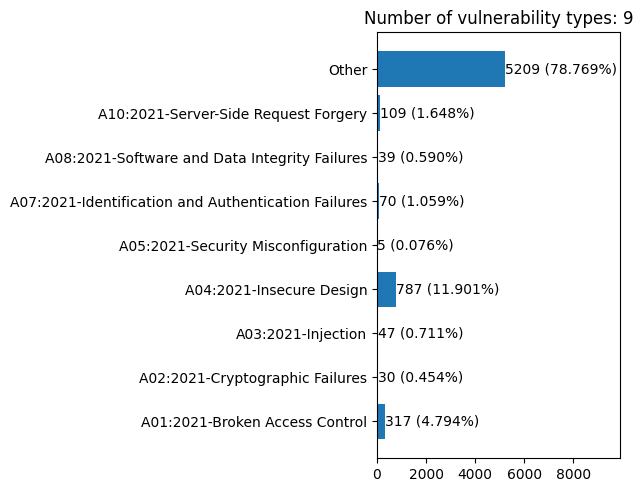

In [3]:
import matplotlib.pyplot as plt
from collections import Counter

type_counter = Counter([vul_type[item["labels"]] for item in dataset["train"]])
sorted_counts = sorted(type_counter.items(), key=lambda x: x[0])
labels = [x[0] for x in sorted_counts]
values = [x[1] for x in sorted_counts]
total = sum(values)

plt.figure()
plt.bar_label(
    plt.barh(labels, values),
    labels= [f"{v} ({v/total:.3%})" for v in values],
)
plt.xlim(right=max(values)*1.9)
plt.tight_layout()
plt.title(f"Number of vulnerability types: {len(labels)}")
plt.show()

## 重新分类-豆包

In [4]:
from datasets import load_dataset
from collections import Counter

dataset = load_dataset("Hacker0x01/hackerone_disclosed_reports")
dataset = dataset.filter(
    lambda example:
    example["title"] is not None and
    example["vulnerability_information"] is not None and
    example["title"].strip() != "" and
    example["vulnerability_information"].strip() != "" and
    example["weakness"] is not None
)

type_counter = Counter([item["weakness"]["name"] for item in dataset["train"]])
print(dict(type_counter))

{'Improper Authorization': 22, 'Improper Authentication - Generic': 377, 'Command Injection - Generic': 127, 'Cross-Site Request Forgery (CSRF)': 256, 'Open Redirect': 182, 'Client-Side Enforcement of Server-Side Security': 8, 'Inconsistency Between Implementation and Documented Design': 1, 'Cross-site Scripting (XSS) - Generic': 599, 'Information Disclosure': 724, 'Privilege Escalation': 220, 'Cross-site Scripting (XSS) - Reflected': 293, 'Insufficiently Protected Credentials': 21, 'Violation of Secure Design Principles': 507, 'Improper Restriction of Authentication Attempts': 54, 'Uncontrolled Resource Consumption': 305, 'Plaintext Storage of a Password': 8, 'Information Exposure Through an Error Message': 19, 'Improper Access Control - Generic': 340, 'SQL Injection': 128, 'Cross-site Scripting (XSS) - Stored': 287, 'Code Injection': 179, 'Modification of Assumed-Immutable Data (MAID)': 13, 'File and Directory Information Exposure': 4, 'Memory Corruption - Generic': 236, 'Buffer Over

In [5]:
vul_type_dict = {
    "Cross-site Scripting (XSS)": ["Cross-site Scripting (XSS) - Generic", "Cross-site Scripting (XSS) - Reflected",
                                   "Cross-site Scripting (XSS) - Stored", "Cross-site Scripting (XSS) - DOM",
                                   "Cross-Site Scripting (XSS)",
                                   "Improper Neutralization of Script-Related HTML Tags in a Web Page (Basic XSS)"],
    "Cross Site Request Forgery (CSRF)": ["Cross-Site Request Forgery (CSRF)"],
    "Open Redirect": ["Open Redirect"],
    "Code Injection": ["Code Injection"],
    "SQL Injection": ["SQL Injection"],
    "Command Injection": ["Command Injection - Generic", "OS Command Injection"],
    "CRLF Injection": ["CRLF Injection"],
    "Server-Side Request Forgery (SSRF)": ["Server-Side Request Forgery (SSRF)", "Server Side Request Forgery"],
    "Insecure Deserialization": ["Deserialization of Untrusted Data"],
    "XML External Entity (XXE)": ["XML External Entities (XXE)"],
    "Authorization and Authentication Issues": ["Improper Authorization", "Improper Authentication - Generic",
                                                "Improper Restriction of Authentication Attempts",
                                                "Insufficient Session Expiration",
                                                "Reliance on Cookies without Validation and Integrity Checking in a Security Decision",
                                                "Missing Critical Step in Authentication",
                                                "Authentication Bypass Using an Alternate Path or Channel",
                                                "Unverified Password Change", "Authentication Bypass by Primary Weakness",
                                                "Authentication Bypass", "Missing Required Cryptographic Step",
                                                "Incorrect Permission Assignment for Critical Resource",
                                                "Reliance on Untrusted Inputs in a Security Decision",
                                                "Insufficient Verification of Data Authenticity"],
    "Information Disclosure": ["Information Disclosure", "Information Exposure Through an Error Message",
                               "File and Directory Information Exposure",
                               "Information Exposure Through Debug Information",
                               "Information Exposure Through Directory Listing",
                               "Information Exposure Through Sent Data",
                               "Information Exposure Through Timing Discrepancy",
                               "Exposure of Sensitive Information Due to Incompatible Policies",
                               "Externally Controlled Reference to a Resource in Another Sphere",
                               "Exposure of Sensitive Information",
                               "Cleartext Storage of Sensitive Information",
                               "Insecure Storage of Sensitive Information",
                               "Cleartext Transmission of Sensitive Information",
                               "Storing Passwords in a Recoverable Format",
                               "Use of Cache Containing Sensitive Information",
                               "Password in Configuration File",
                               "Cleartext Storage in a File or on Disk",
                               "Improper Removal of Sensitive Information Before Storage or Transfer"],
    "Privilege Escalation": ["Privilege Escalation", "Improper Privilege Management"],
    "Resource Consumption and Management": ["Uncontrolled Resource Consumption",
                                            "Allocation of Resources Without Limits or Throttling",
                                            "Uncontrolled Recursion"],
    "Memory and Buffer Issues": ["Memory Corruption - Generic", "Buffer Over-read", "Use After Free",
                                 "NULL Pointer Dereference", "Heap Overflow", "Classic Buffer Overflow",
                                 "Buffer Underflow", "Buffer Under-read", "Array Index Underflow",
                                 "Integer Underflow", "Integer Overflow", "Wrap-around Error", "Off-by-one Error",
                                 "Incorrect Calculation of Buffer Size"],
    "Business Logic Errors": ["Business Logic Errors", "Expected Behavior Violation", "Misinterpretation of Input"],
    "Race Conditions": ["Time-of-check Time-of-use (TOCTOU) Race Condition",
                        "Concurrent Execution using Shared Resource with Improper Synchronization ('Race Condition')"],
    "Insecure Direct Object Reference (IDOR)": ["Insecure Direct Object Reference (IDOR)"],
    "Phishing and Social Engineering": ["Phishing"],
    "XML and LDAP Injection": ["XML Injection", "LDAP Injection"],
    "Path Traversal": ["Path Traversal", "Relative Path Traversal", "Path Traversal: '.../...//'"],
    "UI Redressing (Clickjacking)": ["UI Redressing (Clickjacking)"],
    "Session Fixation": ["Session Fixation"],
    "Weak Cryptography": ["Cryptographic Issues - Generic", "Weak Cryptography for Passwords",
                          "Use of a Broken or Risky Cryptographic Algorithm",
                          "Use of Cryptographically Weak Pseudo-Random Number Generator (PRNG)",
                          "Inadequate Encryption Strength", "Use of a Key Past its Expiration Date",
                          "Reusing a Nonce, Key Pair in Encryption", "Missing Encryption of Sensitive Data"],
    "Malware and Embedded Code": ["Malware", "Embedded Malicious Code"],
    "Configuration and Design Issues": ["Violation of Secure Design Principles", "Misconfiguration",
                                        "Security Through Obscurity", "Leftover Debug Code (Backdoor)",
                                        "Using Components with Known Vulnerabilities"],
    "User Interface (UI) Issues": ["User Interface (UI) Misrepresentation of Critical Information", "Content Spoofing"],
    "File Inclusion": ["Remote File Inclusion", "PHP Local File Inclusion"],
    "Resource Injection": ["Resource Injection"],
    "Other": ["Client-Side Enforcement of Server-Side Security",
              "Inconsistency Between Implementation and Documented Design",
              "Modification of Assumed-Immutable Data (MAID)",
              "Forced Browsing",
              "XML Entity Expansion",
              "External Control of Critical State Data",
              "Weak Password Recovery Mechanism for Forgotten Password",
              "HTTP Response Splitting",
              "Man-in-the-Middle",
              "Insecure Temporary File",
              "Cache Poisoning",
              "Use of Hard-coded Credentials",
              "Use of Hard-coded Cryptographic Key",
              "Use of Hard-coded Password",
              "Improper Check or Handling of Exceptional Conditions",
              "Stack Overflow",
              "LLM01: Prompt Injection",
              "Exposed Dangerous Method or Function",
              "Unchecked Error Condition",
              "Type Confusion",
              "Use of Externally-Controlled Format String",
              "Improper Handling of URL Encoding (Hex Encoding)",
              "Improper Handling of Insufficient Permissions or Privileges",
              "Improper Neutralization of HTTP Headers for Scripting Syntax",
              "Improper Synchronization",
              "Unrestricted Upload of File with Dangerous Type",
              "Use of Inherently Dangerous Function"]
}

vul_type = list(vul_type_dict.keys())

cwe_2_vul_type = {}
for key in vul_type_dict:
    for cwe in vul_type_dict[key]:
        cwe_2_vul_type[cwe] = vul_type.index(key)
print(cwe_2_vul_type)
dataset = dataset.map(lambda example: {'labels': cwe_2_vul_type[example["weakness"]["name"]] if example["weakness"]["name"] in cwe_2_vul_type else vul_type.index("Other")})

{'Cross-site Scripting (XSS) - Generic': 0, 'Cross-site Scripting (XSS) - Reflected': 0, 'Cross-site Scripting (XSS) - Stored': 0, 'Cross-site Scripting (XSS) - DOM': 0, 'Cross-Site Scripting (XSS)': 0, 'Improper Neutralization of Script-Related HTML Tags in a Web Page (Basic XSS)': 0, 'Cross-Site Request Forgery (CSRF)': 1, 'Open Redirect': 2, 'Code Injection': 3, 'SQL Injection': 4, 'Command Injection - Generic': 5, 'OS Command Injection': 5, 'CRLF Injection': 6, 'Server-Side Request Forgery (SSRF)': 7, 'Server Side Request Forgery': 7, 'Deserialization of Untrusted Data': 8, 'XML External Entities (XXE)': 9, 'Improper Authorization': 10, 'Improper Authentication - Generic': 10, 'Improper Restriction of Authentication Attempts': 10, 'Insufficient Session Expiration': 10, 'Reliance on Cookies without Validation and Integrity Checking in a Security Decision': 10, 'Missing Critical Step in Authentication': 10, 'Authentication Bypass Using an Alternate Path or Channel': 10, 'Unverified P

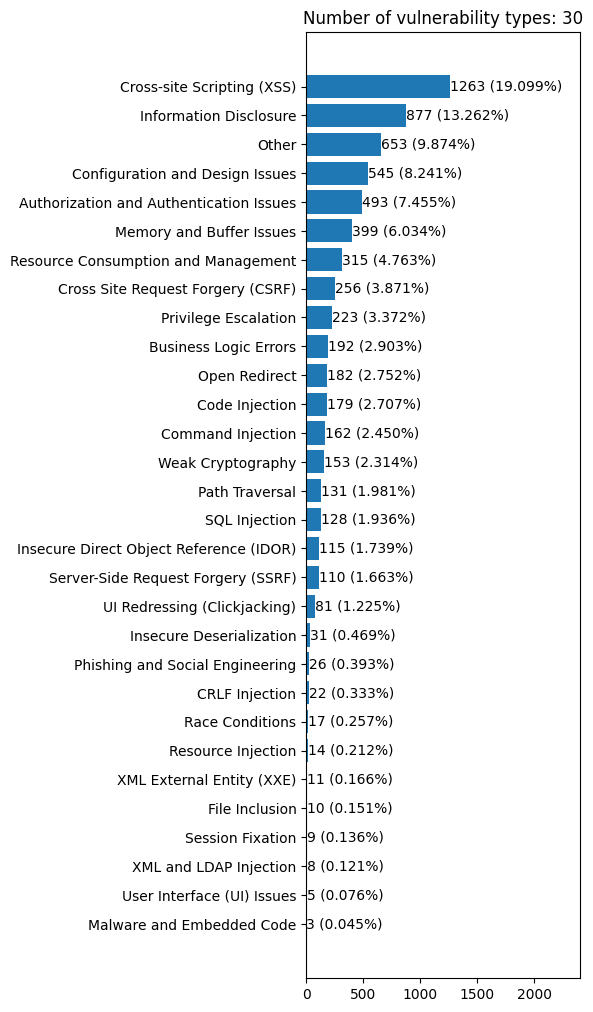

In [6]:
import matplotlib.pyplot as plt
from collections import Counter

type_counter = Counter([vul_type[item["labels"]] for item in dataset["train"]])
sorted_counts = sorted(type_counter.items(), key=lambda x: x[1])
labels = [x[0] for x in sorted_counts]
values = [x[1] for x in sorted_counts]
total = sum(values)

plt.figure(figsize=(6, 10))
plt.bar_label(
    plt.barh(labels, values),
    labels= [f"{v} ({v/total:.3%})" for v in values],
)
plt.xlim(right=max(values)*1.9)
plt.tight_layout()
plt.title(f"Number of vulnerability types: {len(labels)}")
plt.show()

In [7]:
from transformers import BertTokenizer
import transformers
from torch.utils.data import DataLoader
import torch

tokenizer = BertTokenizer.from_pretrained("google-bert/bert-base-uncased")

def tokenize_function(example):
    return tokenizer(example["title"], example["vulnerability_information"], padding=True, max_length=512, truncation=True)

verbosity = transformers.logging.get_verbosity(); transformers.logging.set_verbosity_error()
tokenized_datasets = dataset.map(tokenize_function, batched=True)
transformers.logging.set_verbosity(verbosity)
tokenized_datasets = tokenized_datasets.select_columns(['input_ids', 'token_type_ids', 'attention_mask', 'labels'])
tokenized_datasets.set_format("torch")

generator = torch.Generator(device=device)
train_dataloader = DataLoader(tokenized_datasets["train"], shuffle=True, batch_size=16, generator=generator)
validation_dataloader = DataLoader(tokenized_datasets["validation"], shuffle=True, batch_size=16, generator=generator)
test_dataloader = DataLoader(tokenized_datasets["test"], shuffle=True, batch_size=16, generator=generator)

for batch in train_dataloader:
    print({k: v.shape for k, v in batch.items()})
    break

{'input_ids': torch.Size([16, 512]), 'token_type_ids': torch.Size([16, 512]), 'attention_mask': torch.Size([16, 512]), 'labels': torch.Size([16])}


## 训练

In [8]:
from transformers import BertForSequenceClassification
from torch.optim import AdamW
from tqdm.auto import tqdm

model = BertForSequenceClassification.from_pretrained("google-bert/bert-base-uncased", num_labels=len(vul_type))

def train(lr, epochs, model, train_dataloader, validation_dataloader):
    optimizer = AdamW(model.parameters(), lr=lr)

    train_losses, train_accs, val_losses, val_accs = [],[],[],[]
    best_val_acc = 0.0
    
    pbar = tqdm(total=epochs * len(train_dataloader))

    for epoch in range(epochs):
        model.train()
        train_loss, train_correct = 0, 0
        for batch in train_dataloader:
            outputs = model(**batch)
            batch_loss = outputs.loss
            batch_loss.backward()
            optimizer.step()
            optimizer.zero_grad()

            train_loss += batch_loss.item()
            train_correct += (outputs.logits.argmax(1) == batch["labels"]).sum().item()

            pbar.set_postfix({'lr':lr, 'epoch': f'{epoch + 1}/{epochs}', 'batch_loss': batch_loss.item(), 'best_val_acc': f'{best_val_acc:.3%}' })
            pbar.update(1)


        model.eval()
        val_loss, val_correct = 0, 0
        with torch.no_grad():
            for batch in validation_dataloader:
                outputs = model(**batch)
                batch_loss = outputs.loss
                
                val_loss += batch_loss.item()
                val_correct += (outputs.logits.argmax(1) == batch["labels"]).sum().item()


        train_losses.append( train_loss / len(train_dataloader) )
        train_accs.append( train_correct / len(train_dataloader.dataset) )
        val_losses.append( val_loss / len(validation_dataloader) )
        val_accs.append( val_correct / len(validation_dataloader.dataset) )

        if val_accs[-1] > best_val_acc:
            best_val_acc = val_accs[-1]
            torch.save(model.state_dict(), f"model_lr_{lr}_epoch_{epoch+1}_acc_{best_val_acc:.5}.pt")
    
    return train_losses, train_accs, val_losses, val_accs

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google-bert/bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [9]:
lr_list = [5e-5, 3e-5, 2e-5]
train_losses_list, train_accs_list, val_losses_list, val_accs_list = [],[],[],[]
for lr in lr_list:
    model = BertForSequenceClassification.from_pretrained("google-bert/bert-base-uncased", num_labels=len(vul_type))
    train_losses, train_accs, val_losses, val_accs = train(lr=lr, epochs=10, model=model, train_dataloader=train_dataloader, validation_dataloader=validation_dataloader)
    train_losses_list.append(train_losses)
    train_accs_list.append(train_accs)
    val_losses_list.append(val_losses)
    val_accs_list.append(val_accs)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google-bert/bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
100%|██████████| 4140/4140 [1:41:26<00:00,  1.47s/it, lr=5e-5, epoch=10/10, batch_loss=0.247, best_val_acc=68.133%]  
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google-bert/bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
100%|██████████| 4140/4140 [1:41:29<00:00,  1.47s/it, lr=3e-5, epoch=10/10, batch_loss=0.00649, best_val_acc=67.776%]
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google-bert/bert-base-uncased and are newly initialized: [

[[1.8165223222711813, 1.1389082876812433, 0.8598304377589825, 0.6071628718704417, 0.40391286508886565, 0.28593857280442103, 0.19991432247314475, 0.1479404190350504, 0.11889844108260449, 0.11173999667896525], [2.0475885685227344, 1.2030241404466584, 0.9165427443629878, 0.6505731877641402, 0.45009348761056356, 0.2916778673323384, 0.19526629323580702, 0.1330997050933288, 0.11438381071944816, 0.09927274304574832], [2.1680820970143673, 1.3203749343536901, 1.0122022497769139, 0.7680537211866194, 0.5564277389667173, 0.3776499505204279, 0.27048400589737337, 0.17317188675132927, 0.13701343930726825, 0.1148022527936936]], [[0.4961439588688946, 0.6890972327234236, 0.7556328443973991, 0.8286707999395131, 0.8853772871616513, 0.9195523967941932, 0.9454105549674883, 0.9600786329956147, 0.9674882806593075, 0.9664297595644942], [0.4391350370482383, 0.6714048087101164, 0.7430818085588992, 0.8236806290639649, 0.8815968546801755, 0.9275669136549222, 0.9535762891274762, 0.9688492363526388, 0.97036140934522

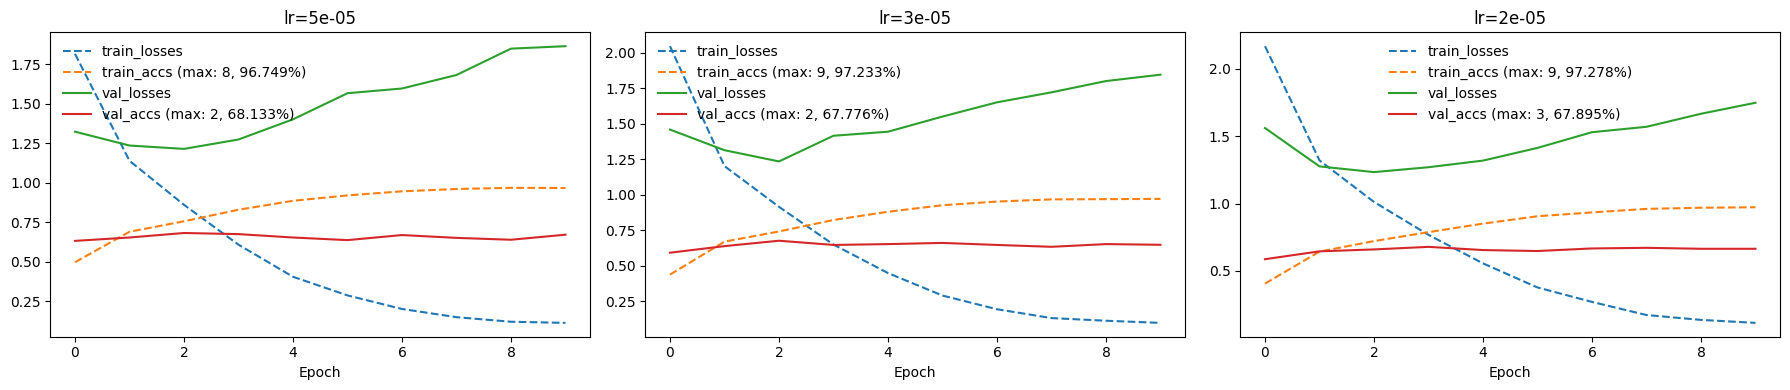

In [10]:
print(f"{train_losses_list}, {train_accs_list}, {val_losses_list}, {val_accs_list}")

def plot_subplot(ax, title, train_losses, train_accs, val_losses, val_accs):
    ax.plot(train_losses, label="train_losses", linestyle='--')
    ax.plot(train_accs, label=f"train_accs (max: {train_accs.index(max(train_accs))}, {max(train_accs):.3%})", linestyle='--')
    ax.plot(val_losses, label="val_losses")
    ax.plot(val_accs, label=f"val_accs (max: {val_accs.index(max(val_accs))}, {max(val_accs):.3%})")
    ax.legend(frameon=False)
    ax.set_xlabel("Epoch")
    ax.set_title(title)

fig, axes = plt.subplots(1, 3, figsize=(18, 4))
for idx, lr in enumerate(lr_list):
    plot_subplot(
        axes[idx], 
        f"lr={lr}", 
        train_losses_list[idx], 
        train_accs_list[idx], 
        val_losses_list[idx], 
        val_accs_list[idx]
    )
plt.tight_layout()
plt.show()

## 评估

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google-bert/bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
100%|██████████| 52/52 [00:21<00:00,  2.36it/s]


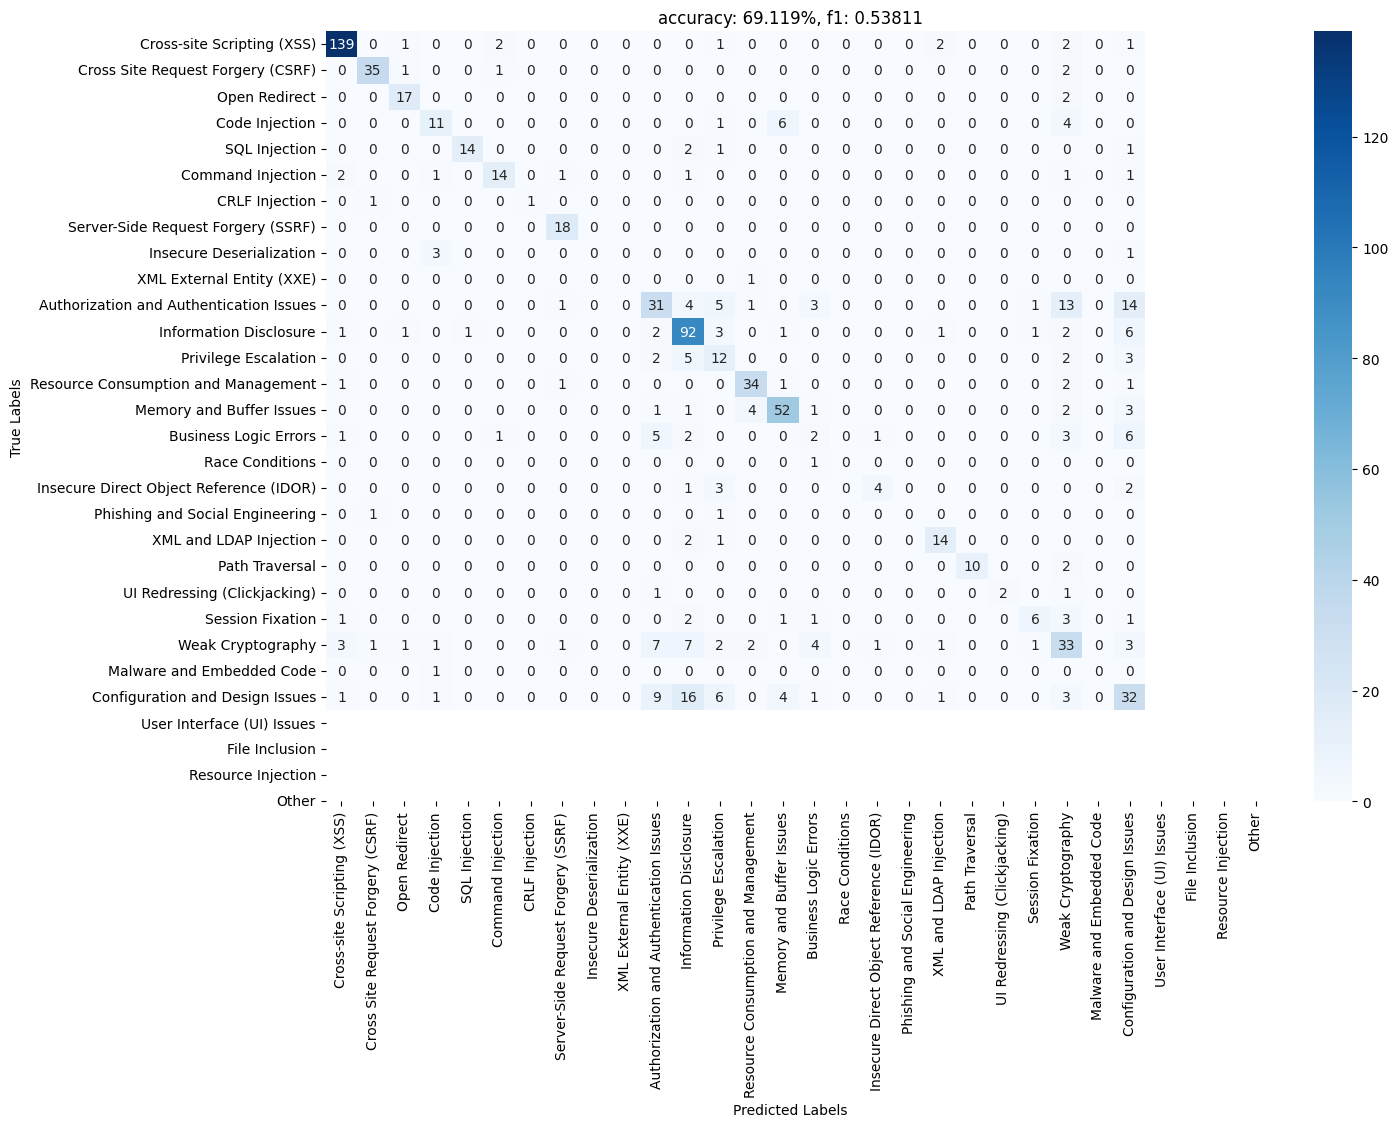

In [16]:
model = BertForSequenceClassification.from_pretrained("google-bert/bert-base-uncased", num_labels=len(vul_type))
model.load_state_dict(torch.load('./model_lr_5e-05_epoch_3_acc_0.68133.pt', weights_only=True, map_location=device))

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm

def evaluate(model, dataloader):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for batch in tqdm(dataloader):
            outputs = model(**batch)
            preds = outputs.logits.argmax(1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(batch["labels"].cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds, average='macro')
    cm = confusion_matrix(all_labels, all_preds)
    return accuracy, f1, cm

def plot_confusion_matrix(title, cm, labels):
    plt.figure(figsize=(15, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(title)
    plt.show()

accuracy, f1, cm = evaluate(model, test_dataloader)
plot_confusion_matrix(f'accuracy: {accuracy:.3%}, f1: {f1:.5}', cm, vul_type)